# PROGETTO DI ESAME PER LABORATORIO DI BIG DATA, DATA MINING E DATA ANALYTICS

# Introduzione

L'obiettivo di questo progetto è analizzare un dataset su YU-GI-OH! per identificare pattern e trend significativi nelle loro caratteristiche. Utilizzando librerie Python comuni per l'analisi dei dati (numpy, pandas, matplotlib, seaborn, sklearn), sono stati esplorati diversi aspetti, come il tipo, il type, l'attributo, la data di rilascio, statistiche principali, e abbbiamo infine ricreato il concetto di staple.

# Fonte dei dati

Il dataset è stato scaricato da Kaggle al seguente link: [Yu-Gi-Oh! Cards](https://www.kaggle.com/datasets/ioexception/yugioh-cards?resource=download). Contiene informazioni dettagliate sulle carte usciite negli anni, inclusi id, nome, tipo, attacco, difesa, attributo e molto altro che ci servirà in seguito per un analisi approfondita. È stato salvato in formato CSV e caricato nel repository del progetto.

# Obiettivi dell'analisi

1.  Analisi dei vari Tipi di carte in yu-gi-oh!:

    -   rendere chiara l'analisi anche a qualcuno che non ha mai visto una carta
    -   visualizzare le caratteristiche di ogni tipo di carta  
    -   distribuzione dei vari tipi di carta 

2.  Analisi approfondita dei Mostri 
    -   visualizzare la distribuzione del dato  "Attribute" 
    -   visualizzare la distribuzione del dato  "race" 
    -   visualizzare la distribuzione del dato  "type" 

3. Definire se esiste una relazione tra livello e statistiche

    -   determinare l'esistenza di una relazione tra le statistiche attacco/difesa di un mostro e il suo livello

4. Analizzare la storicità del rilascio delle carte

    -    visualizzare l'andamento del rilascio delle carte tra i due formati OCG e TCG
    -    dedurre informazioni dall'analisi

5. Analisi delle Staple 
    -  visualizzazione delle staple e della loro descrizione

# Metodologia

Pulizia dei dati:
- Le colonne non pertinenti sono state rimosse peer semplificare l'analisi
- I valori mancanti nelle colonne chiave sono stati gestiti in modo appropriato (es. sostituzione con "None" per type2).

Tecniche di Analisi:                                             
- Analisi descrittiva per visualizzare distribuzioni e statistiche riassuntive.
- Regressioni lineari e analisi delle correlazioni per indagare relazioni tra variabili.
- Test statistici per confrontare i gruppi.

Colore dei Grafici:
- Grafici interattivi e statici (scatter plot, box plot, line plot, heatmap, plotly).
- Uso di codifiche cromatiche coerenti per rappresentare variabili chiave (es. tipi dei Pokémon).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Importo le libreire neccessarie.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as px
import requests
from PIL import Image
from io import BytesIO

Carico e visualizzo il dataset.

In [2]:

cards_df = pd.read_csv("cards.csv")

cards_df.head()


,id,name,type,desc,atk,def,level,race,attribute,scale,...,views,viewsweek,upvotes,downvotes,formats,treated_as,tcg_date,ocg_date,konami_id,has_effect
0,34541863,"""A"" Cell Breeding Device",Spell Card,"During each of your Standby Phases, put 1 A-Co...",NaN,NaN,NaN,Continuous,NaN,NaN,...,300590,0,118,110,Duel Links|Common Charity|Edison|TCG|OCG|Maste...,NaN,2007-05-16,2007-02-15,7128.0,1
1,64163367,"""A"" Cell Incubator",Spell Card,Each time an A-Counter(s) is removed from play...,NaN,NaN,NaN,Continuous,NaN,NaN,...,212234,0,25,20,Duel Links|Common Charity|Edison|TCG|OCG|Maste...,NaN,2007-11-14,2007-07-21,7315.0,1
2,91231901,"""A"" Cell Recombination Device",Spell Card,Target 1 face-up monster on the field; send 1 ...,NaN,NaN,NaN,Quick-Play,NaN,NaN,...,221212,0,19,15,Duel Links|Common Charity|TCG|OCG|Master Duel,NaN,2016-11-03,2016-07-09,12653.0,1
3,73262676,"""A"" Cell Scatter Burst",Spell Card,"Select 1 face-up ""Alien"" monster you control. ...",NaN,NaN,NaN,Quick-Play,NaN,NaN,...,168545,26,12,4,Duel Links|Common Charity|Edison|TCG|OCG|Maste...,NaN,2007-02-28,2006-11-16,6994.0,1
4,98319530,"""Infernoble Arms - Almace""",Spell Card,While this card is equipped to a monster: You ...,NaN,NaN,NaN,Equip,NaN,NaN,...,52664,26,0,0,TCG|OCG|Master Duel,NaN,2023-07-27,2023-04-22,18843.0,1


Seleziono delle colonne necessarie per l'analisi e verifica dei dati selezionati.

In [3]:
columns_to_keep = ['name', 'type', 'atk', 'def', 'level', 'race', 'attribute', 'archetype', 
                   'views', 'viewsweek', 'upvotes', 'downvotes', 'has_effect','ocg_date',
                   'tcg_date','staple','desc','image_url_small']
cards_df = cards_df[columns_to_keep]
cards_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             13281 non-null  object 
 1   type             13281 non-null  object 
 2   atk              8631 non-null   float64
 3   def              8216 non-null   float64
 4   level            8216 non-null   float64
 5   race             13280 non-null  object 
 6   attribute        8631 non-null   object 
 7   archetype        7788 non-null   object 
 8   views            13281 non-null  int64  
 9   viewsweek        13281 non-null  int64  
 10  upvotes          13281 non-null  int64  
 11  downvotes        13281 non-null  int64  
 12  has_effect       13281 non-null  int64  
 13  ocg_date         12881 non-null  object 
 14  tcg_date         12865 non-null  object 
 15  staple           64 non-null     object 
 16  desc             13281 non-null  object 
 17  image_url_sm

In [4]:

sns.set_theme(style="whitegrid")

colors = {
    # colori Attributi
    'WATER': '#4d94ff', 'WIND': '#66cc66', 'LIGHT': "#f5e97d",
    'DARK': "#1f134d", 'FIRE': "#ef0606",'EARTH': '#b2996e', 'DIVINE': "#e2e95e", 'Effect Monster': "#8f5e09",'atk': "#ef0606",
    'Warrior': "#c8740c", 'Machine': "#5f5f5f", 'Fiend': "#8a5ae8", 'Spellcaster': "#a33896", 'Fairy': "#ff61c5", 'Dragon': "#f6482a", 'Beast': "#7c4106", 'Winged Beast': "#099921", 'Aqua': '#4d94ff',
    'Insect': "#2fc424", 'Rock': "#8A5802", 'Beast-Warrior': "#bb3217", 'Zombie': "#9743d7", 'Plant': "#0ad70d", 'Reptile': "#057a14",'Cyberse': "#40e5f5",'Pyro': "#ff691f",'Fish': "#1485c2",'Thunder': "#e7ff30", 'Dinosaur': '#4d94ff',
    'Effect Monster': "#c77101",'Trap Card': '#9013b9','Spell Card': "#2fc424", 'Normal Monster': "#e0be36", 'XYZ Monster': "#020b01", 'Fusion Monster': "#831baf", 'Link Monster': "#1e83ef", 'Syncro Monster': "#eef4ed", 'Pendulum Effect Monster': "#1a12b4",
}

# 1.  Analisi dei vari Tipi di carte in yu-gi-oh!:

- Rendere chiara l'analisi anche a qualcuno che non ha mai visto una carta.

- Visualizzare le caratteristiche di ogni tipo di carta.

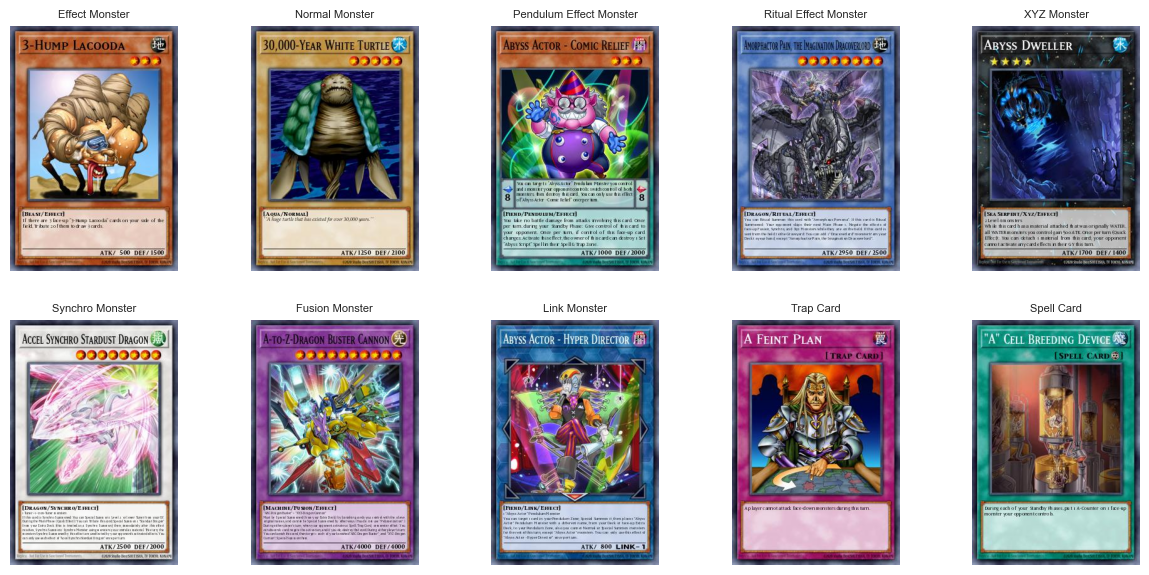

In [5]:
def display_specific_card_types_images():
    
    #scelgo queli tipi di carte voglio analizzare
    target_types_display_order = [
        'Effect Monster',
        'Normal Monster',
        'Pendulum Effect Monster',
        'Ritual Effect Monster',
        'XYZ Monster',
        'Synchro Monster',
        'Fusion Monster',
        'Link Monster',
        'Trap Card',
        'Spell Card'
    ]
    
    #creo un inseme di stringe in minuscolo per evitare errori dovuti alla formattazione del testo
    target_types_lower_set = {t.lower() for t in target_types_display_order}

    #rimuovo le riche dove mancano i dati in type e image_url _small
    df_clean = cards_df.dropna(subset=['type', 'image_url_small'])

    #memorizzo il primo esempio di ogni immagine per ogni tipo di carta e evito i duplicati
    type_images_found = {}
    found_types_lower_in_data = set()

    #salva una sola immagne per ogni tipo desiderato
    #interrompe il ciclo una volta trovato le immagini per ogni tipo richesto
    for _, row in df_clean.iterrows():
        card_type_original = str(row['type']).strip()
        card_type_lower = card_type_original.lower()
        image_url = str(row['image_url_small']).strip()

        if card_type_lower in target_types_lower_set and card_type_lower not in found_types_lower_in_data:
            type_images_found[card_type_original] = image_url
            found_types_lower_in_data.add(card_type_lower)
            if len(type_images_found) == len(target_types_display_order):
                break

    #prepara le immagini da visualizzare
    images_to_display = [
        (t, type_images_found[t])
        for t in target_types_display_order if t in type_images_found
    ]


    #setup della griglia per mostrare le immagini
    cols = 5
    rows = math.ceil(len(images_to_display) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3.5))
    axes = axes.ravel() if rows > 1 else axes


    #visualizzazione delle immagini
    for i, (card_type, url) in enumerate(images_to_display):
        ax = axes[i]
        img = Image.open(BytesIO(requests.get(url).content)) #scariica l'immagine da internet
        ax.imshow(img)                                       #e la mostra
        ax.set_title(card_type, fontsize=8)
        ax.axis("off")
    
display_specific_card_types_images()

# - Distribuzione dei vari tipi di carta

 Calcolo la frequenza di ogni type.

In [6]:
type_counts = cards_df['type'].value_counts()

Calcolo i valori percentuali.

In [7]:
total_cards = type_counts.sum()
type_percentages = (type_counts / total_cards) * 100

Creo un DataFrame per Plotly con conteggi e percentuali.

In [8]:
plot_data = pd.DataFrame({ 'Tipo': type_counts.index, 'Conteggio': type_counts.values, 'Percentuale': type_percentages.values})

Filtro i tipi che sono rappresentati da meno dell'1%.

In [9]:
filtered_plot_data = plot_data[plot_data['Percentuale'] >= 1]

Creo il grafico a torta filtrato con percentuali e le etichette direttamente sulle fette e "estraiamo" leggermeente le fette.

In [10]:

fig = px.pie(filtered_plot_data, values='Conteggio', names='Tipo', title='Distribuzione delle Carte per Tipo (Escluso < 1%) con la Tua Palette Completa',
hole=0.3, width=800, height=700, color='Tipo', color_discrete_map=colors)
fig.update_traces(textinfo='percent+label', pull=[0.05]*len(filtered_plot_data))
fig.show()

# 2.  Analisi approfondita dei Mostri 

-   Visualizzare la distribuzione del dato "Attribute".

Conta dei valori di vari attributi dei mostri.

In [11]:
attribute = (cards_df['attribute']).value_counts()

Visualizzo il grafico a barre.

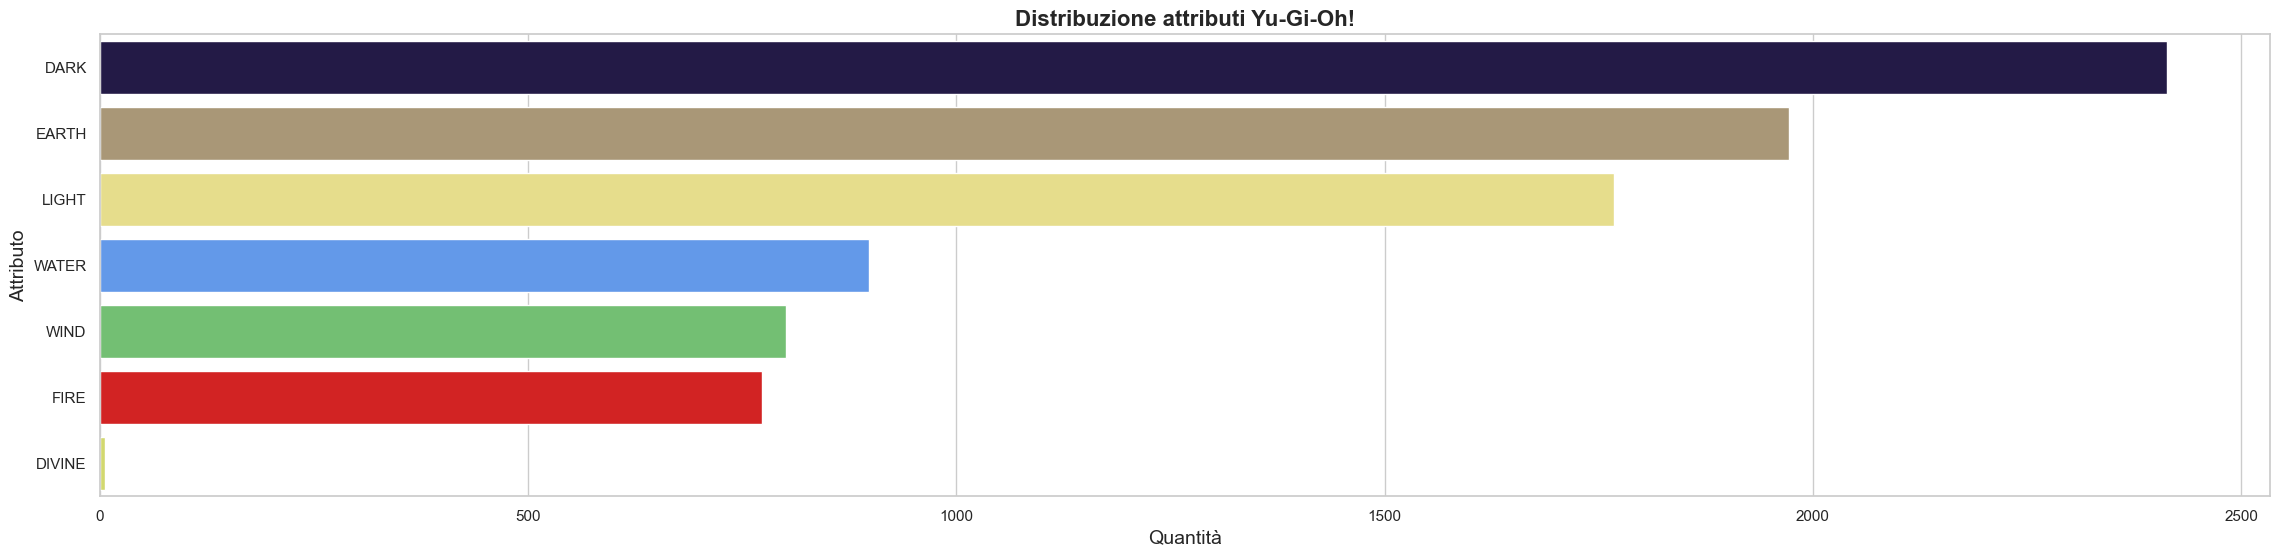

In [12]:
plt.figure(figsize=(28, 6))
sns.barplot(y=attribute.index, x=attribute.values, hue=attribute.index, palette=colors, edgecolor='white', dodge=False) 
plt.title('Distribuzione attributi Yu-Gi-Oh!', fontsize=16, fontweight='bold')
plt.ylabel('Attributo', fontsize=14)
plt.xlabel('Quantità', fontsize=14)
plt.show()

- Visualizzare la distribuzione del dato "race".

Conta dei vari types (race) dei mostri.

In [13]:
race = (cards_df['race']).value_counts()

Filtro solo le carte Mostro Effetto o Mostro Normale.

In [14]:
filtered_df = cards_df[cards_df['type'].isin(['Effect Monster', 'Normal Monster'])]

Ottengo i 20 types (race) più comuni e filtriamo il DataFrame per includere solo questi 20 types.

In [15]:
race_order = filtered_df['race'].value_counts().index[:20]
filtered_df_top20 = filtered_df[filtered_df['race'].isin(race_order)]

Visualizzo il grafico a barre.

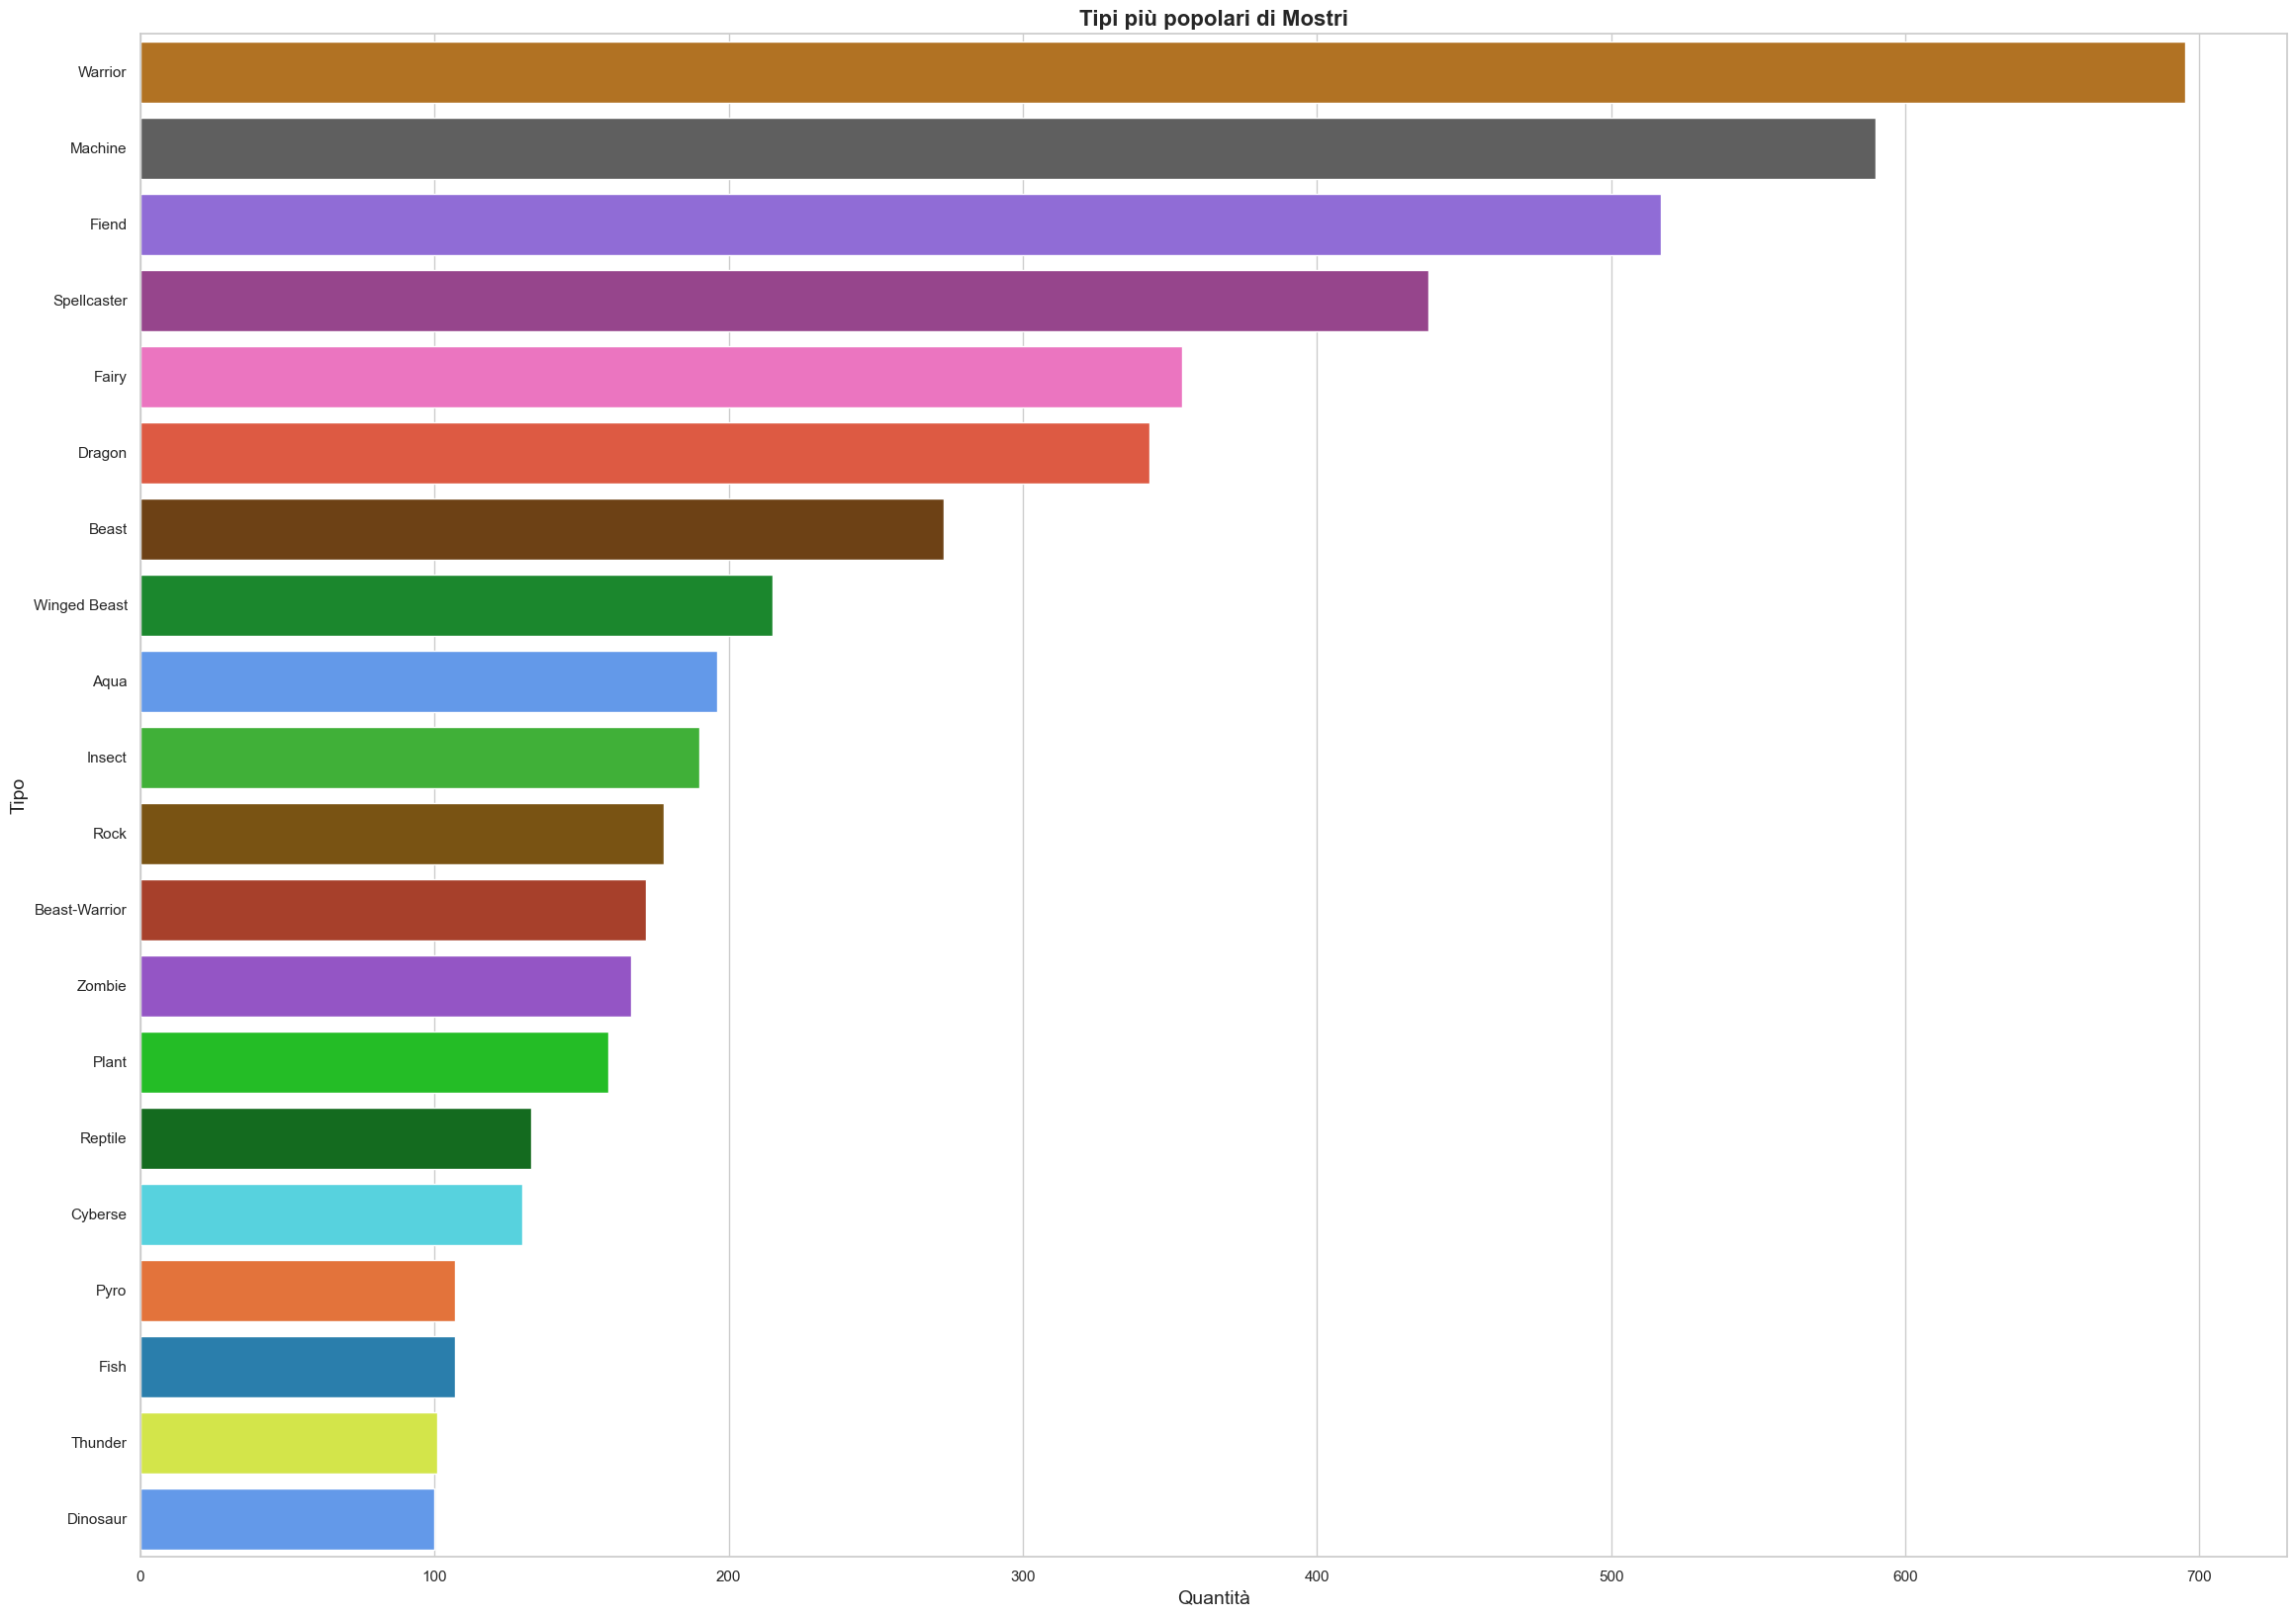

In [16]:
plt.figure(figsize=(28, 20))
sns.countplot(data=filtered_df_top20, y='race', order=race_order, hue='race', palette=colors, dodge=False, legend=False)
plt.title('Tipi più popolari di Mostri', fontsize=16, fontweight='bold')
plt.ylabel('Tipo', fontsize=14)
plt.xlabel('Quantità', fontsize=14)
plt.show()

- Visualizzare la distribuzione del tipo di mostri.

Creo un grafico a torta solo per i tipi di mostri selezionati.

In [18]:
def plot_selected_card_types_pie(cards_df, colors=None):
  
    # Seleziono i tipi di interesse
    selected_types = [
        'Effect Monster',
        'Normal Monster',
        'XYZ Monster',
        'Fusion Monster',
        'Link Monster'
    ]

    # Filtro solo le righe con questi tipi
    filtered_df = cards_df[cards_df['type'].isin(selected_types)]

    # Calcolo frequenze e percentuali
    type_counts = filtered_df['type'].value_counts()
    total_selected = type_counts.sum()
    type_percentages = (type_counts / total_selected) * 100

    # Costruisco un DataFrame per Plotly
    plot_data = pd.DataFrame({
        'Tipo': type_counts.index,
        'Conteggio': type_counts.values,
        'Percentuale': type_percentages.values
    })

    # Crea grafico a ciambella
    fig = px.pie(
        plot_data,
        values='Conteggio',
        names='Tipo',
        title='Distribuzione delle Carte Mostro per Tipo ',
        hole=0.3,
        width=800,
        height=700,
        color='Tipo',
        color_discrete_map=colors
    )

    # Aggiungi etichette + percentuali e "pull" delle fette
    fig.update_traces(textinfo='percent+label', pull=[0.05] * len(plot_data))
    fig.show()
plot_selected_card_types_pie(cards_df, colors)

-   Visualizzare la relazione tra attacco difesa e livello 

Creo l'istogramma per visualizzare la distribuzione dell'attacco della difesa e del livello.

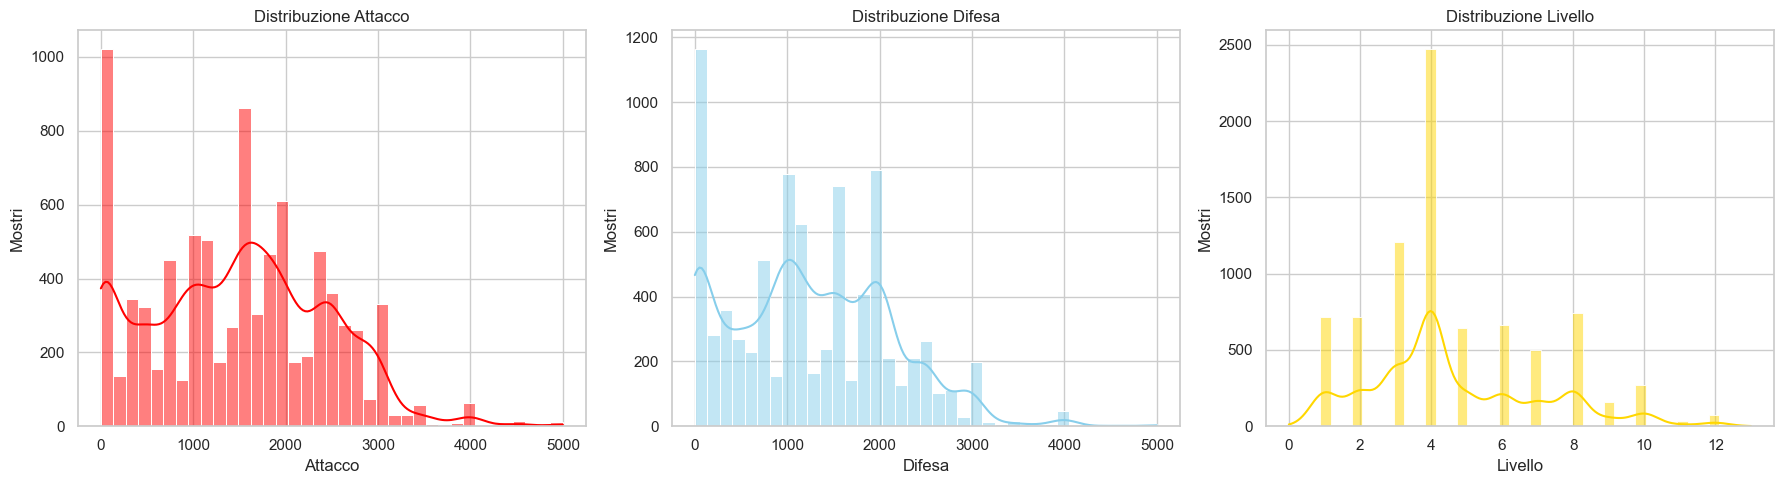

In [19]:
 #imposto la griglia
fig, axs = plt.subplots(1, 3, figsize=(18, 5)) 

#grafico dell'attacco
axs[0].set_title('Distribuzione Attacco')
axs[0].set_xlabel('Attacco') 
axs[0].set_ylabel('Mostri')

#grafico della difesa
axs[1].set_title('Distribuzione Difesa')
axs[1].set_xlabel('Difesa')
axs[1].set_ylabel('Mostri')

#grafico del livello
axs[2].set_title('Distribuzione Livello')
axs[2].set_xlabel('Livello')
axs[2].set_ylabel('Mostri') 

#imposto il tema di seaborn
sns.set_theme(style="whitegrid")
#visualizzo tramite un istogramma assegnandogli un colore
sns.histplot(cards_df['atk'].dropna(), kde=True, ax=axs[0], color='red')
sns.histplot(cards_df['def'].dropna(), kde=True, ax=axs[1], color='skyblue')
sns.histplot(cards_df['level'].dropna(), kde=True, ax=axs[2], color='gold')

plt.tight_layout()
plt.show()

# 3. Definire una relazione tra livello e statistiche:

- Visualizzazione delle due relazioni attacco/livello e difesa/livello.

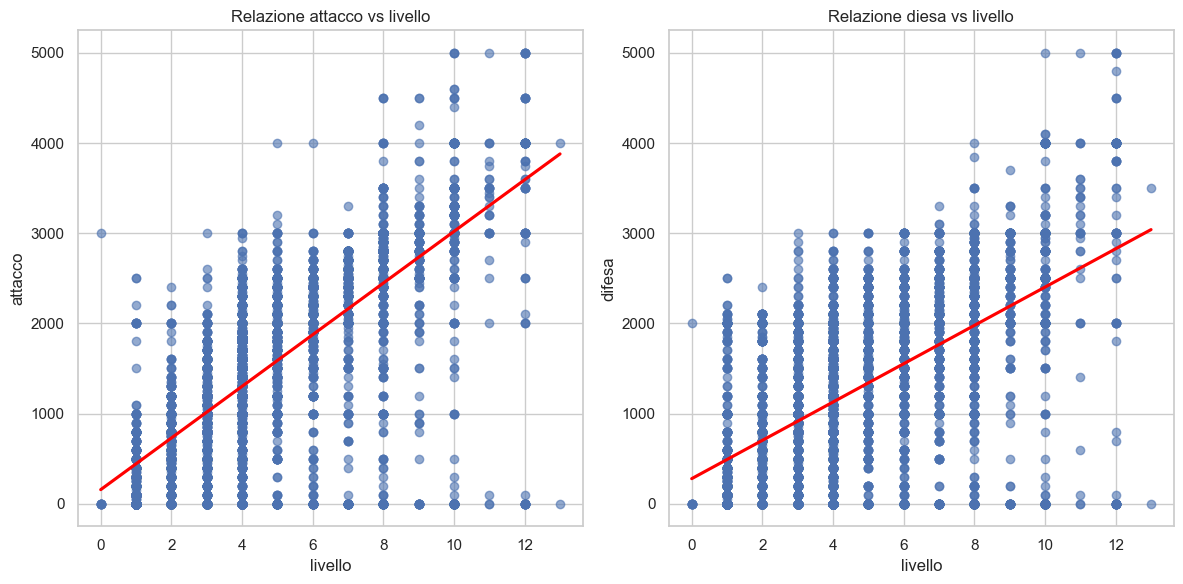

In [20]:
plt.figure(figsize=(12, 6))

# Relazione attacco/livello
plt.subplot(1, 2, 1)
sns.regplot(x='level', y='atk', data=cards_df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title('Relazione attacco vs livello')
plt.xlabel('livello')
plt.ylabel('attacco')

# Relazione difesa/livello
plt.subplot(1, 2, 2)
sns.regplot(x='level', y='def', data=cards_df,scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title('Relazione diesa vs livello')
plt.xlabel('livello')
plt.ylabel('difesa')

plt.tight_layout()
plt.show()

#  4. Analizzare la storicità del rilascio delle carte:

- visualizzare l'andamento del rilascio delle carte tra i due formati OCG e TCG

Eestraggo l'anno di rilascio.

In [21]:
cards_df['ocg_year_extracted'] = pd.to_datetime(cards_df['ocg_date']).dt.year
cards_df['tcg_year_extracted'] = pd.to_datetime(cards_df['tcg_date']).dt.year

Visualizzazione delle distribuzioni.

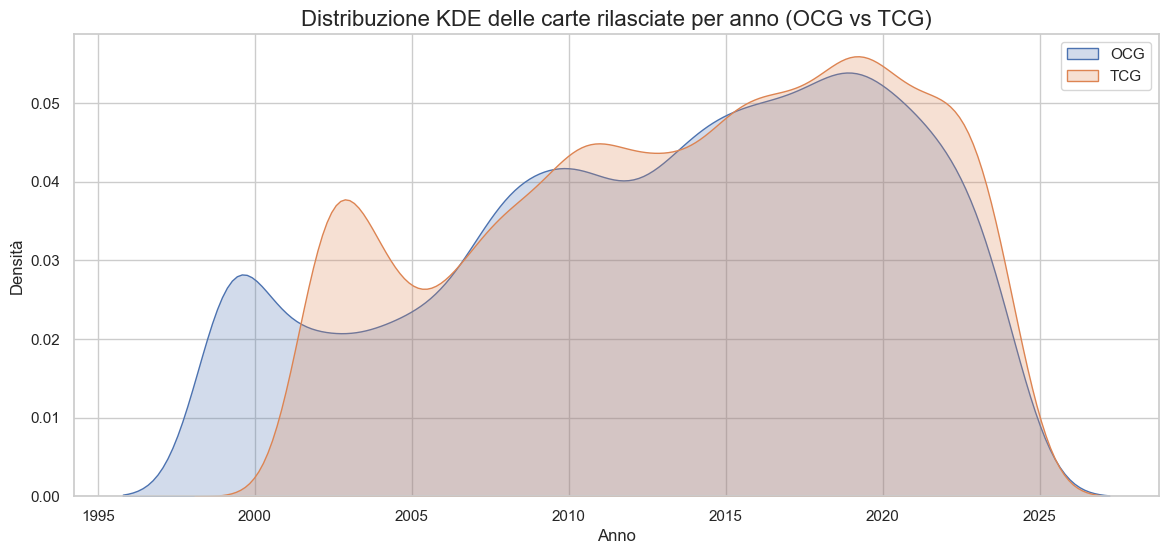

In [22]:
plt.figure(figsize=(14, 6))
sns.kdeplot(data=cards_df, x='ocg_year_extracted', label='OCG', fill=True)
sns.kdeplot(data=cards_df, x='tcg_year_extracted', label='TCG', fill=True)
plt.title("Distribuzione KDE delle carte rilasciate per anno (OCG vs TCG)", fontsize=16)
plt.xlabel("Anno")
plt.ylabel("Densità")
plt.legend()
plt.show()

# 5. Analisi delle staple

- Visualizzare le staple e la loro descrizione.

formattazazione del testo su piu righe

In [28]:
def format_description(text, char_limit_per_line=60):

    #divido il testo in parole usando lo spazio come separatore
    words = text.split(' ') 
    
    #parametri neccessari
    formatted_text = []
    current_line_length = 0
    current_line_words = []

    #analizzo tutte le parole nel testo
    for word in words:
        
        #controllo se aggiungendo una nuova parola supero il limite di caratteri
        if current_line_length + len(word) + (1 if current_line_length > 0 else 0) > char_limit_per_line and current_line_length > 0:
            
            #unisco le parole della riga corrente con uno spazio e le aggiungo al risultato
            formatted_text.append(' '.join(current_line_words))
            
            #inizio una nuova riga con la parola che non entra nella precedente
            current_line_words = [word]
            current_line_length = len(word)
            
        #viene aggiunta la parola aggiornando la lunghezza della riga considerando anche lo spazio se neccessario
        else:
            current_line_words.append(word)
            current_line_length += len(word) + (1 if current_line_length > 0 else 0) # +1 per lo spazio
    
    #aggiungo l'ultima riga rimasta dopo il ciclo
    formatted_text.append(' '.join(current_line_words)) 
    
    #unisco tutte le righe usando <br> come separatore 
    return '<br>'.join(formatted_text)

Filtro le carte per staple.

In [24]:
staple_cards = cards_df[cards_df['staple'].astype(str).str.lower() == 'yes'].copy()


Gestisco i valori NaN in 'desc' e applico la formattazione della descrizione. 

In [25]:
staple_cards['desc'] = staple_cards['desc'].fillna('') # Sostituisci NaN con stringa vuota
staple_cards['formatted_desc'] = staple_cards['desc'].apply(format_description)

Creo il grafico a dispersione.

In [26]:
fig = px.scatter(staple_cards,
                     x='tcg_date',
                     y='upvotes',
                     hover_name='name',             
                     hover_data=['formatted_desc'], 
                     title='Carte Staple: Distribuzione Cronologica per Upvotes',
                     labels={
                         'tcg_date': 'Data di Rilascio (TCG)',
                         'upvotes': 'Numero di Upvotes',
                         'formatted_desc': 'Descrizione' 
                     },
                     color_discrete_sequence=['#ff4d4d']
                    )

Personalizzazioni aggiuntive e visualizzazione del grafico.

In [29]:
fig.update_layout(
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        title_font_size=18,
        height=600,
        width=1000
    )

# Conclusioni 

# 1. Analisi dei vari Tipi di carte in yu-gi-oh!

- Esistono vari tipi di carte con varie caratteristiche e sono tutte visualizzabili in output.

- Distribuzione di ogni tipo di carta: 

    - I tipi di carta più frequenti nel dataset sono Effect Monster, Spell Card, Trap Card e Normal Monster. 
I restanti sono rappresentati sotto al 4%.

# 2.  Analisi approfondita dei Mostri 

- Distribuzione del dato attributo:

    - gli attributi più frequenti sono DARK, HEART e LIGHT mentre i meno popolari sono WATER, WIND, FIRE e DIVINE.

- Distribuzione del dato race: 

    - i tipi di mostri sono numerosi e i maggiori tre sono Warrior, Machine e Fiend mentre i tre meno popolari sono Fish, Thunder e Dinosaur.

- Distribuzione del dato type: 

    - i type di carte mostro più popolari sono i Effect Monster, Normal Monster e XYZ Monster mentre i meno popolari sono i Fusion Monster e Link Monster.

# 3.  Definire se esite una relazione tra livello e statistiche

- Attacco: notiamo che il valore di attaco piu popolare è 0 mentre il valore medio e sui 1400.

- Difesa: anche nella difesa il valore più popolare è lo 0 mentere la media è piu orientata verso i 1100.

- Livello: questo è il grafico di gran lunga più significativo notiamo infatti che in yu-gi-oh! non esiste il livello 0 e che il piu popolare è di gran lunga il 4.
notiamo in oltre che non esiste una legge che lega il livello all attacco o alla difesa del mostro ma avendo pochissimi casi di altisismo livello e altissime statistiche, mentre abbiamo svaritati casidi basse statistiche e relativamente basso livello possiamo dedurre che in qualche modo siano connessi i due.

# 4. Analisi della storicità del rilascio delle carte in yu-gi-oh!

- Nascita:
    
    - possiamo notare che yu-gi-oh! ha avuto due date di inizio diverse tra tcg (formato europeo) e ocg (formato asiatico) di fatti yu-gi-oh! nasce in giappone nel 1996 per poi essere importato in europa solo in seguito nel 1999. Posso quindi notare che le carte rilasciate in ocg sono state sin da subito recuperate con una produzione più massiva in tcg negli anni tra il 2001 e il 2005. 

- Crescita:
    
    - Posso quindi notare che le carte rilasciate in ocg sono state sin da subito recuperate con una produzione più massiva in tcg negli anni tra il 2001 e il 2005.

- Sviluppo odierno:

    - Noto anche che in svariati periodi storici il numero di carte rilasciate in tcg super anche se di poco quelle rilasciate in ocg, questo ci fa pensare a delle tcg exclusive overo carte rilasciate unicamente per il formato tcg.

# 5. Analaisi delle staple

- piu votate:
    
    - notiamo  che le staple più apprezzate al momento della analisi sono Raigeki, Red-Eyes Dark Dragoon e Monster Reborn.

- concetto di staple:
    
    - essendo le staple le carte più giocate o apprezzate da tutta la player base di yu-gi-oh! è giusto che le carte più iconice come rageki e monster reborn mantengano un numero di voti sensibilemente più alto (carte iconice del protagonista del manga), ma possiamo comunque notare che rientrano numericamente più staple negli ultimi 6 anni confronto al passato essendo yu-gi-oh! un gioco in continua crescita ed evoluzione.